In [129]:
import pandas as pd


df = pd.read_csv('../scrapers/data/requirements_txt.psv', sep='|',
                names=['repo', 'date', 'requirements'])
df = df.dropna() # I need to clean this data better. 

latest_data = df.groupby('repo').max()
baskets = latest_data['requirements'].map(lambda s: s.split(',')).values

from apriori import apriori
sorter = lambda r: r.bayesian_confidence/r.confidence*r.lift
filterer = lambda r: r['bayesian_confidence'] > 0.66
rules = apriori(baskets, 30, max_k=2, filter_rule=filterer, sort_key=sorter)

In [130]:
len(rules)

873

In [131]:
%pylab inline
figsize(18,18)

Populating the interactive namespace from numpy and matplotlib


In [132]:
import networkx as nx
G = nx.Graph()

In [133]:
G.add_weighted_edges_from((r['start_items'][0], r['other_items'][0], r['confidence']) for r in rules)

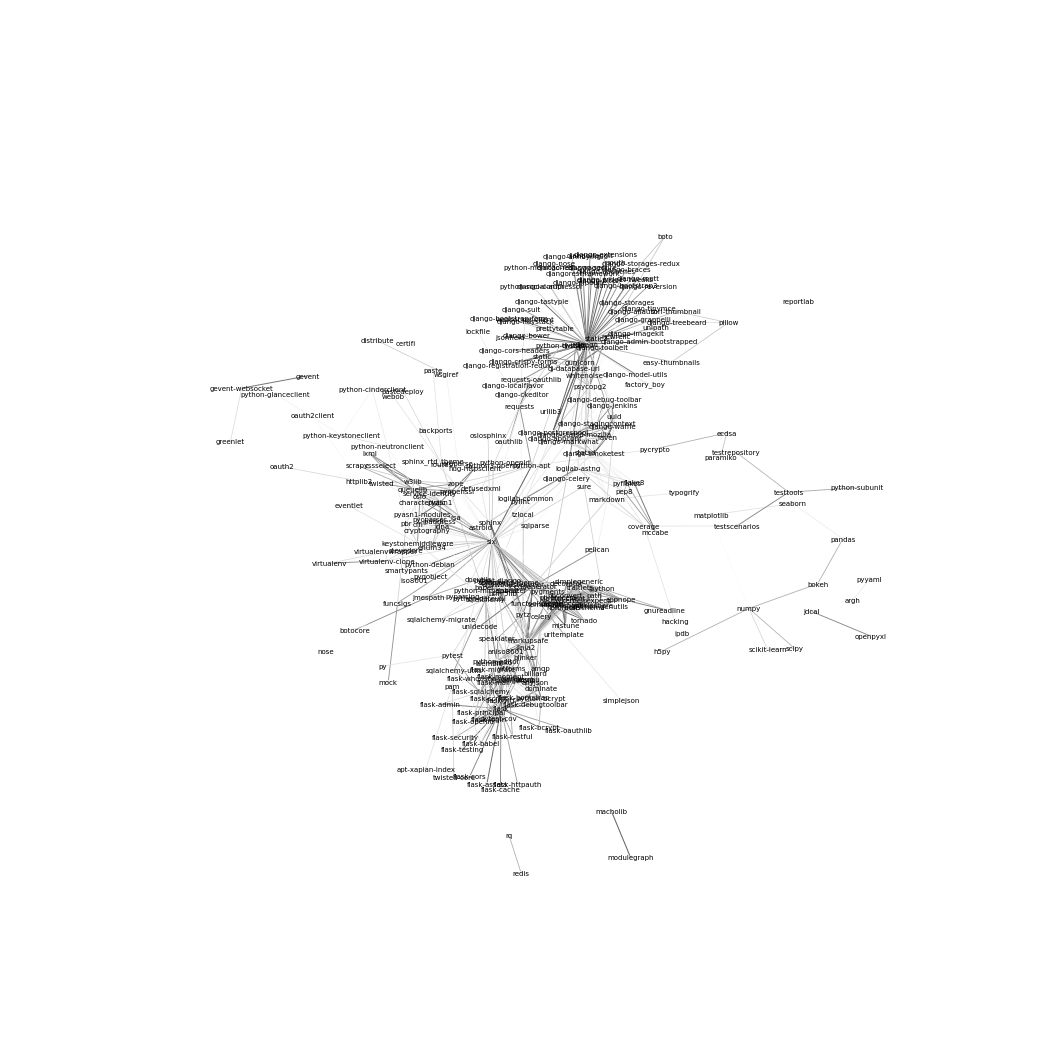

In [136]:
pos = nx.spring_layout(G, iterations=30, k=0.1)
ax = plt.subplot(111)
cmap = plt.get_cmap("Greys")
weights = [G[x][y]['weight'] for x,y in G.edges()]
weight = lambda x: abs(x)**(2)

width = [weight(w) for w in weights]

nx.draw_networkx_edges(G, pos, ax = ax, edge_vmin=0.55, edge_vmax=1.2, edge_cmap=cmap, edge_color = width, width=width)
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=1, linewidths=3, node_color="white")
nx.draw_networkx_labels(G, pos,font_size=7, ax=ax)
plt.axis("off");
plt.savefig('weighted_network.png', bbox_inches="tight", dpi=250)